In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")


#Loading Data

In [2]:
cancer = pd.read_csv('cancer.csv')

In [3]:
cancer.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,2
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,2
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,2
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,2


In [4]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      569 non-null    float64
 1   V2      569 non-null    float64
 2   V3      569 non-null    float64
 3   V4      569 non-null    float64
 4   V5      569 non-null    float64
 5   V6      569 non-null    float64
 6   V7      569 non-null    float64
 7   V8      569 non-null    float64
 8   V9      569 non-null    float64
 9   V10     569 non-null    float64
 10  V11     569 non-null    float64
 11  V12     569 non-null    float64
 12  V13     569 non-null    float64
 13  V14     569 non-null    float64
 14  V15     569 non-null    float64
 15  V16     569 non-null    float64
 16  V17     569 non-null    float64
 17  V18     569 non-null    float64
 18  V19     569 non-null    float64
 19  V20     569 non-null    float64
 20  V21     569 non-null    float64
 21  V22     569 non-null    float64
 22  V2

In [5]:
cancer['Class'].value_counts()

1    357
2    212
Name: Class, dtype: int64

In [6]:
X = cancer.drop(['Class'],axis=1)

In [7]:
y = cancer['Class']

#Train And Test Splitting

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(455, 30) (114, 30) (455,) (114,)


#Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#LinearDiscriminantAnalysis

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 1)
X_lda_train = lda.fit_transform(X_train, y_train)
X_lda_test = lda.transform(X_test)

In [17]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_lda_train, y_train)

LogisticRegression(random_state=0)

In [19]:
y_train_pred = classifier.predict(X_lda_train)

print("Metrics on Train samples")
print("============================================================== ")
print("confusion_matrix: \n",confusion_matrix(y_train,y_train_pred))
print("classification_report: \n",classification_report(y_train,y_train_pred))
print("============================================================== ")

y_test_pred = classifier.predict(X_lda_test)

print("Metrics on Test samples ")
print("============================================================== ")
print("confusion_matrix: \n",confusion_matrix(y_test,y_test_pred))
print("classification_report: \n",classification_report(y_test,y_test_pred))
print("============================================================== ")

Metrics on Train samples
confusion_matrix: 
 [[284   2]
 [  7 162]]
classification_report: 
               precision    recall  f1-score   support

           1       0.98      0.99      0.98       286
           2       0.99      0.96      0.97       169

    accuracy                           0.98       455
   macro avg       0.98      0.98      0.98       455
weighted avg       0.98      0.98      0.98       455

Metrics on Test samples 
confusion_matrix: 
 [[67  4]
 [ 2 41]]
classification_report: 
               precision    recall  f1-score   support

           1       0.97      0.94      0.96        71
           2       0.91      0.95      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



#Locally Linear Embedding

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
from sklearn import manifold
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [ ]:
X['V1']

0      17.99
1      20.57
2      19.69
3      11.42
4      20.29
       ...  
564    21.56
565    20.13
566    16.60
567    20.60
568     7.76
Name: V1, Length: 569, dtype: float64

In [ ]:
model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified',
                               eigen_solver='dense')
out = model.fit_transform(X)

In [ ]:
colorize = dict(c=X['V1'], cmap=plt.cm.get_cmap('rainbow', 5))

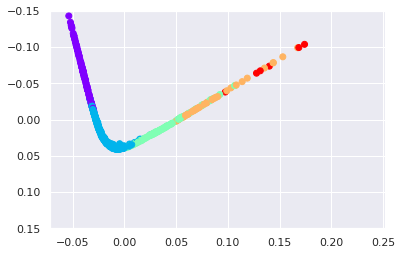

In [ ]:
fig, ax = plt.subplots()
ax.scatter(out[:, 0], out[:, 1], **colorize)
ax.set_ylim(0.15, -0.15);

#Multi Dimensional Scaling(MDS)

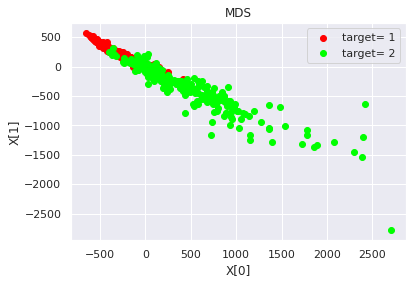

In [ ]:
mds=manifold.MDS(n_components=2)
X_r=mds.fit_transform(X)

### graph
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
colors=((1,0,0),(0,1,0),(0,0,1),(0.5,0.5,0),(0,0.5,0.5),(0.5,0,0.5),
       (0.4,0.6,0),(0.6,0.4,0),(0,0.6,0.4),(0.5,0.3,0.2),)
for label ,color in zip( np.unique(y),colors):
  position=y==label
  ax.scatter(X_r[position,0],X_r[position,1],label="target= {0}".format(label),color=color)

ax.set_xlabel("X[0]")
ax.set_ylabel("X[1]")
ax.legend(loc="best")
ax.set_title("MDS")
plt.show() 

#PCA

In [ ]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
X_PCA = sklearn_pca.fit_transform(X)


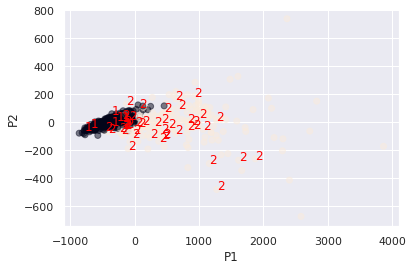

In [ ]:
fig,ax = plt.subplots()
ax.scatter(x=X_PCA[:,0],y=X_PCA[:,1],marker='o',alpha=0.5,c=y)
plt.xlabel('P1')
plt.ylabel('P2')

for i,txt in enumerate(y[:50]):
	ax.annotate(txt,(X_PCA[i,0],X_PCA[i,1]),color='red')

In [ ]:
from sklearn.model_selection import train_test_split
X_PCA_train,X_PCA_test,y_train,y_test = train_test_split(X_PCA,y,test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_PCA_train,y_train)

LogisticRegression()

In [ ]:
y_train_pred = lr.predict(X_PCA_train)

print("Metrics on Train samples")
print("============================================================== ")
print("confusion_matrix: \n",confusion_matrix(y_train,y_train_pred))
print("classification_report: \n",classification_report(y_train,y_train_pred))
print("============================================================== ")

y_test_pred = lr.predict(X_PCA_test)

print("Metrics on Test samples ")
print("============================================================== ")
print("confusion_matrix: \n",confusion_matrix(y_test,y_test_pred))
print("classification_report: \n",classification_report(y_test,y_test_pred))
print("============================================================== ")

Metrics on Train samples
confusion_matrix: 
 [[274   9]
 [ 23 149]]
classification_report: 
               precision    recall  f1-score   support

           1       0.92      0.97      0.94       283
           2       0.94      0.87      0.90       172

    accuracy                           0.93       455
   macro avg       0.93      0.92      0.92       455
weighted avg       0.93      0.93      0.93       455

Metrics on Test samples 
confusion_matrix: 
 [[70  4]
 [ 3 37]]
classification_report: 
               precision    recall  f1-score   support

           1       0.96      0.95      0.95        74
           2       0.90      0.93      0.91        40

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



#Quadratic Discriminant Analysis (QDA)

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

qda = QDA(store_covariance=False)

y_pred = qda.fit(X_train, y_train).predict(X_test)

In [ ]:
y_train_pred = qda.predict(X_train)

print("Metrics on Train samples")
print("============================================================== ")
print("confusion_matrix: \n",confusion_matrix(y_train,y_train_pred))
print("classification_report: \n",classification_report(y_train,y_train_pred))
print("============================================================== ")

y_test_pred = qda.predict(X_test)

print("Metrics on Test samples ")
print("============================================================== ")
print("confusion_matrix: \n",confusion_matrix(y_test,y_test_pred))
print("classification_report: \n",classification_report(y_test,y_test_pred))
print("============================================================== ")

Metrics on Train samples
confusion_matrix: 
 [[284   2]
 [  8 161]]
classification_report: 
               precision    recall  f1-score   support

           1       0.97      0.99      0.98       286
           2       0.99      0.95      0.97       169

    accuracy                           0.98       455
   macro avg       0.98      0.97      0.98       455
weighted avg       0.98      0.98      0.98       455

Metrics on Test samples 
confusion_matrix: 
 [[68  3]
 [ 2 41]]
classification_report: 
               precision    recall  f1-score   support

           1       0.97      0.96      0.96        71
           2       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



#Singular Vector Decomposition

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_std = StandardScaler().fit_transform(X)

In [ ]:
import numpy as np

u,s,v = np.linalg.svd(X_std.T)

print("First Orthogonal Matrix: \n")
print(u)
print("\n")
print("First Orthogonal Matrix shape \n")
print(u.shape)
print("\n")

print("Second Orthogonal Matrix: \n")
print(v)
print("\n")
print("Second Orthogonal Matrix shape \n")
print(v.shape)
print("\n")


print("Diagonal Matrix \n")
print(s)
print("\n")
print("Diagonal Matrix shape\n")
print(s.shape)

First Orthogonal Matrix: 

[[-2.18902439e-01  2.33857137e-01  8.53125261e-03 -4.14089762e-02
   3.77863323e-02 -1.87407820e-02  1.24088391e-01 -7.45234243e-03
   2.23109709e-01 -9.54864661e-02  4.14714685e-02 -5.10675763e-02
  -1.19674252e-02  5.95060959e-02  5.11188791e-02  1.50583805e-01
  -2.02924297e-01 -1.46712166e-01  2.25384736e-01  4.96984139e-02
   6.85698770e-02  7.29292251e-02  9.85526055e-02  1.82579544e-01
  -1.92263087e-02 -1.29476422e-01 -1.31526621e-01 -2.11193995e-01
  -2.11460459e-01 -7.02414093e-01]
 [-1.03724575e-01  5.97061046e-02 -6.45498699e-02  6.03050009e-01
  -4.94687663e-02  3.21788486e-02 -1.13995093e-02  1.30674823e-01
  -1.12699486e-01 -2.40933855e-01 -3.02243709e-01 -2.54896091e-01
  -2.03461493e-01 -2.15599620e-02  1.07922716e-01  1.57841744e-01
   3.87062003e-02  4.11030472e-02  2.97886929e-02  2.44134822e-01
  -4.48369592e-01  9.48004344e-02  5.55039180e-04 -9.87868353e-02
   8.47458982e-02 -2.45566863e-02 -1.73572960e-02  6.58086041e-05
   1.05339333e

In [ ]:
print(u[:, :2].shape)
print(np.diag(s[:2]).shape)
print(v[:2, :].shape)
#Reconstructing the using SVD for 2 components
X_svd2 = np.matrix(u[:, :2]) * np.diag(s[:2]) * np.matrix(v[:2, :])

print("\n #Reconstructing the using SVD for 2 components \n")
print(X_svd2)
print("\n")

print(X_svd2.shape)
print("\n")
print(X_svd2.T.shape)

(30, 2)
(2, 2)
(2, 569)

 #Reconstructing the using SVD for 2 components 

[[ 1.55664441  1.40390948  1.50660097 ...  0.71984638  1.88005632
  -1.04171095]
 [ 0.83718081  0.47265658  0.6589404  ...  0.24387539  0.97629192
  -0.52787618]
 [ 1.67241446  1.35415428  1.5360326  ...  0.69516644  2.00086717
  -1.10151351]
 ...
 [ 2.29026388  0.63018064  1.44743209 ...  0.33086547  2.58908409
  -1.36812412]
 [ 1.406313   -0.24116911  0.5521727  ... -0.11551408  1.51233981
  -0.76808452]
 [ 1.74799006 -0.72285244  0.45959767 ... -0.35823311  1.82760155
  -0.90620189]]


(30, 569)


(569, 30)


##Using Logistics Regression on X_svd2 Using construct SVD

In [ ]:
#Using Logistics Regression on X_svd2 Using construct SVD
print("X_svd2 Shape: ")
print(X_svd2.T.shape)
print("y shape")
print(y.shape)

from sklearn.model_selection import train_test_split
X_svd2_train,X_svd2_test,y_train,y_test = train_test_split(X_svd2.T,y,test_size=0.2)

print("X_svd2 Train shape:")
print(X_svd2_train.shape)
print("X_svd2 Test shape:")
print(X_svd2_train.shape)
print("y Train shape:")
print(y_train.shape)
print("y Test shape:")
print(y_test.shape)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_svd2_train,y_train)


X_svd2 Shape: 
(569, 30)
y shape
(569,)
X_svd2 Train shape:
(455, 30)
X_svd2 Test shape:
(455, 30)
y Train shape:
(455,)
y Test shape:
(114,)


LogisticRegression()

In [ ]:
y_train_pred = lr.predict(X_svd2_train)

print("Metrics on Train samples")
print("============================================================== ")
print("confusion_matrix: \n",confusion_matrix(y_train,y_train_pred))
print("classification_report: \n",classification_report(y_train,y_train_pred))
print("============================================================== ")

y_test_pred = lr.predict(X_svd2_test)

print("Metrics on Test samples ")
print("============================================================== ")
print("confusion_matrix: \n",confusion_matrix(y_test,y_test_pred))
print("classification_report: \n",classification_report(y_test,y_test_pred))
print("============================================================== ")

Metrics on Train samples
confusion_matrix: 
 [[282   9]
 [ 11 153]]
classification_report: 
               precision    recall  f1-score   support

           1       0.96      0.97      0.97       291
           2       0.94      0.93      0.94       164

    accuracy                           0.96       455
   macro avg       0.95      0.95      0.95       455
weighted avg       0.96      0.96      0.96       455

Metrics on Test samples 
confusion_matrix: 
 [[63  3]
 [ 3 45]]
classification_report: 
               precision    recall  f1-score   support

           1       0.95      0.95      0.95        66
           2       0.94      0.94      0.94        48

    accuracy                           0.95       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



In [ ]:
print(u[:, :3].shape)
print(np.diag(s[:3]).shape)
print(v[:3, :].shape)
#Reconstructing the using SVD for 2 components
X_svd3 = np.matrix(u[:, :3]) * np.diag(s[:3]) * np.matrix(v[:3, :])

print(X_svd3.shape)
print(X_svd3.T.shape)

(30, 3)
(3, 3)
(3, 569)
(30, 569)
(569, 30)


In [ ]:
#Using Logistics Regression on X_svd3 Using construct SVD
print("X_svd3 Shape: ")
print(X_svd3.T.shape)
print("y shape")
print(y.shape)

from sklearn.model_selection import train_test_split
X_svd3_train,X_svd3_test,y_train,y_test = train_test_split(X_svd3.T,y,test_size=0.2)

print("X_svd3 Train shape:")
print(X_svd3_train.shape)
print("X_svd3 Test shape:")
print(X_svd3_train.shape)
print("y Train shape:")
print(y_train.shape)
print("y Test shape:")
print(y_test.shape)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_svd3_train,y_train)

X_svd3 Shape: 
(569, 30)
y shape
(569,)
X_svd3 Train shape:
(455, 30)
X_svd3 Test shape:
(455, 30)
y Train shape:
(455,)
y Test shape:
(114,)


LogisticRegression()

In [ ]:
y_train_pred = lr.predict(X_svd3_train)

print("Metrics on Train samples")
print("============================================================== ")
print("confusion_matrix: \n",confusion_matrix(y_train,y_train_pred))
print("classification_report: \n",classification_report(y_train,y_train_pred))
print("============================================================== ")

y_test_pred = lr.predict(X_svd3_test)

print("Metrics on Test samples ")
print("============================================================== ")
print("confusion_matrix: \n",confusion_matrix(y_test,y_test_pred))
print("classification_report: \n",classification_report(y_test,y_test_pred))
print("============================================================== ")

Metrics on Train samples
confusion_matrix: 
 [[277   9]
 [ 13 156]]
classification_report: 
               precision    recall  f1-score   support

           1       0.96      0.97      0.96       286
           2       0.95      0.92      0.93       169

    accuracy                           0.95       455
   macro avg       0.95      0.95      0.95       455
weighted avg       0.95      0.95      0.95       455

Metrics on Test samples 
confusion_matrix: 
 [[69  2]
 [ 4 39]]
classification_report: 
               precision    recall  f1-score   support

           1       0.95      0.97      0.96        71
           2       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



##Truncated SVD

In [ ]:
from numpy import array
from sklearn.decomposition import TruncatedSVD

# svd
svd = TruncatedSVD(n_components=2)
svd.fit(X_std)
X_std_svd = svd.transform(X_std)
print(X_std_svd.shape)

(569, 2)


In [ ]:
#Using Logistics Regression on X_std_svd Using SVD
print("X_std_svd Shape: ")
print(X_std_svd.shape)
print("y shape")
print(y.shape)

from sklearn.model_selection import train_test_split
X_std_svd_train,X_std_svd_test,y_train,y_test = train_test_split(X_std_svd,y,test_size=0.2)

print("X_std_svd Train shape:")
print(X_std_svd_train.shape)
print("X_std_svd Test shape:")
print(X_std_svd_train.shape)
print("y Train shape:")
print(y_train.shape)
print("y Test shape:")
print(y_test.shape)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_std_svd_train,y_train)

X_std_svd Shape: 
(569, 2)
y shape
(569,)
X_std_svd Train shape:
(455, 2)
X_std_svd Test shape:
(455, 2)
y Train shape:
(455,)
y Test shape:
(114,)


LogisticRegression()

In [ ]:
y_train_pred = lr.predict(X_std_svd_train)

print("Metrics on Train samples")
print("============================================================== ")
print("confusion_matrix: \n",confusion_matrix(y_train,y_train_pred))
print("classification_report: \n",classification_report(y_train,y_train_pred))
print("============================================================== ")

y_test_pred = lr.predict(X_std_svd_test)

print("Metrics on Test samples ")
print("============================================================== ")
print("confusion_matrix: \n",confusion_matrix(y_test,y_test_pred))
print("classification_report: \n",classification_report(y_test,y_test_pred))
print("============================================================== ")

Metrics on Train samples
confusion_matrix: 
 [[274   9]
 [ 12 160]]
classification_report: 
               precision    recall  f1-score   support

           1       0.96      0.97      0.96       283
           2       0.95      0.93      0.94       172

    accuracy                           0.95       455
   macro avg       0.95      0.95      0.95       455
weighted avg       0.95      0.95      0.95       455

Metrics on Test samples 
confusion_matrix: 
 [[72  2]
 [ 4 36]]
classification_report: 
               precision    recall  f1-score   support

           1       0.95      0.97      0.96        74
           2       0.95      0.90      0.92        40

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [ ]:
from numpy import array
from sklearn.decomposition import TruncatedSVD

# svd
svd = TruncatedSVD(n_components=3)
svd.fit(X_std)
X_std_svd = svd.transform(X_std)
print(X_std_svd.shape)

(569, 3)


In [ ]:
#Using Logistics Regression on X_std_svd Using SVD
print("X_std_svd Shape: ")
print(X_std_svd.shape)
print("y shape")
print(y.shape)

from sklearn.model_selection import train_test_split
X_std_svd_train,X_std_svd_test,y_train,y_test = train_test_split(X_std_svd,y,test_size=0.2)

print("X_std_svd Train shape:")
print(X_std_svd_train.shape)
print("X_std_svd Test shape:")
print(X_std_svd_train.shape)
print("y Train shape:")
print(y_train.shape)
print("y Test shape:")
print(y_test.shape)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_std_svd_train,y_train)

X_std_svd Shape: 
(569, 3)
y shape
(569,)
X_std_svd Train shape:
(455, 3)
X_std_svd Test shape:
(455, 3)
y Train shape:
(455,)
y Test shape:
(114,)


LogisticRegression()

In [ ]:
y_train_pred = lr.predict(X_std_svd_train)

print("Metrics on Train samples")
print("============================================================== ")
print("confusion_matrix: \n",confusion_matrix(y_train,y_train_pred))
print("classification_report: \n",classification_report(y_train,y_train_pred))
print("============================================================== ")

y_test_pred = lr.predict(X_std_svd_test)

print("Metrics on Test samples ")
print("============================================================== ")
print("confusion_matrix: \n",confusion_matrix(y_test,y_test_pred))
print("classification_report: \n",classification_report(y_test,y_test_pred))
print("============================================================== ")

Metrics on Train samples
confusion_matrix: 
 [[274  11]
 [ 12 158]]
classification_report: 
               precision    recall  f1-score   support

           1       0.96      0.96      0.96       285
           2       0.93      0.93      0.93       170

    accuracy                           0.95       455
   macro avg       0.95      0.95      0.95       455
weighted avg       0.95      0.95      0.95       455

Metrics on Test samples 
confusion_matrix: 
 [[69  3]
 [ 0 42]]
classification_report: 
               precision    recall  f1-score   support

           1       1.00      0.96      0.98        72
           2       0.93      1.00      0.97        42

    accuracy                           0.97       114
   macro avg       0.97      0.98      0.97       114
weighted avg       0.98      0.97      0.97       114

